In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1:'class_1', 2: 'class_2'})

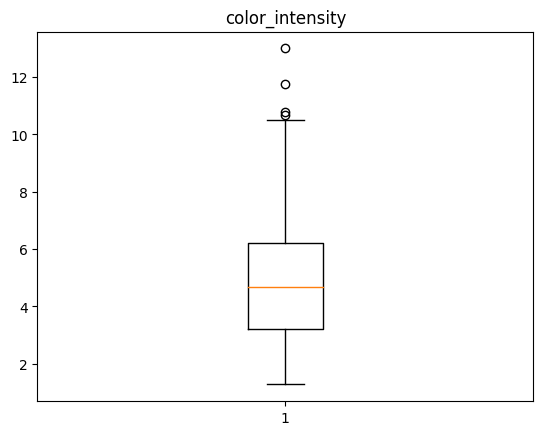

In [2]:
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [3]:
import numpy as np

def outliers_iqr(df, col):
    Q1, Q3 = np.quantile(df[col], [0.25, 0.75])
    iqr = Q3 - Q1
    lower_whis = Q1 - (1.5 * iqr)
    upper_whis = Q3 + (1.5 * iqr)
    outliers = df[(df[col] < lower_whis) | (df[col] > upper_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [4]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('After drop :', drop_outliers.shape)

Original : (178, 14)
After drop : (174, 14)


In [5]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN

wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [6]:
from sklearn.datasets import load_iris

iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns=iris_load.feature_names)
iris['Class'] = iris_load.target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [7]:
pd.get_dummies(iris, columns=['Class'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, random_state=1004)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [10]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), \
                                                     iris['Class'], test_size=0.2, random_state=1004, \
                                                     stratify=iris['Class'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
after_std = std_scaler.fit_transform(X_train)
after_std_test = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
after_mm = mm_scaler.fit_transform(X_train)
after_mm_test = mm_scaler.transform(X_test)

print('===standardscaler===')
print('\t\t(min, max), (mean, std)')
print('Trained_scaled (%.2f, %.2f), (%.2f, %.2f)' % (after_std.min(), after_std.max(), \
                                                    after_std.mean(), after_std.std()))

print('\n\n===minmaxscaler===')
print('\t\t(min, max), (mean, std)')
print('Trained_scaled (%.2f, %.2f), (%.2f, %.2f)' % (after_std.min(), after_std.max(), \
                                                    after_std.mean(), after_std.std()))

===standardscaler===
		(min, max), (mean, std)
Trained_scaled (-2.37, 3.04), (0.00, 1.00)


===minmaxscaler===
		(min, max), (mean, std)
Trained_scaled (-2.37, 3.04), (0.00, 1.00)


In [13]:
from sklearn.preprocessing import RobustScaler

Ro_scaler = RobustScaler()
after_std = Ro_scaler.fit_transform(X_train)
after_std_test = Ro_scaler.transform(X_test)

print('===RobustScaler===')
print('\t\t(min, max), (mean, std)')
print('Trained_scaled (%.2f, %.2f), (%.2f, %.2f)' % (after_std.min(), after_std.max(), \
                                                    after_std.mean(), after_std.std()))



===RobustScaler===
		(min, max), (mean, std)
Trained_scaled (-1.90, 2.67), (-0.02, 0.65)


In [14]:
after_std[:, 0]

array([ 0.84615385, -0.15384615, -0.07692308,  0.38461538, -0.61538462,
       -0.69230769, -0.46153846, -0.07692308, -0.76923077,  0.15384615,
       -0.69230769,  1.15384615,  1.46153846, -0.23076923,  0.        ,
       -0.53846154, -0.61538462,  0.        ,  0.38461538,  1.07692308,
       -0.30769231, -0.53846154,  0.30769231, -0.23076923,  1.38461538,
       -0.07692308,  0.69230769,  0.53846154, -0.07692308, -0.46153846,
       -0.53846154,  0.23076923, -1.        , -0.07692308, -0.92307692,
       -0.23076923,  0.76923077,  0.53846154, -0.15384615,  1.46153846,
        1.07692308,  1.23076923,  0.84615385,  0.46153846, -0.61538462,
       -0.61538462, -1.15384615,  0.        ,  0.46153846,  0.15384615,
       -0.38461538,  0.69230769, -0.53846154, -0.53846154,  0.46153846,
       -0.61538462, -0.23076923, -0.61538462,  0.15384615,  0.07692308,
        0.07692308,  0.        , -0.69230769, -0.92307692, -0.46153846,
        0.92307692, -0.23076923, -1.07692308, -0.61538462,  0.30

In [15]:
pd.DataFrame({'before': X_train.iloc[:, 0],  'after' : after_std[:, 0]})

,before,after
52,6.9,0.846154
121,5.6,-0.153846
95,5.7,-0.076923
136,6.3,0.384615
26,5.0,-0.615385
...,...,...
59,5.2,-0.461538
71,6.1,0.230769
120,6.9,0.846154
148,6.2,0.307692


# PCA

In [16]:
x = iris.drop(columns='Class')
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca_fit = pca.fit(x)

print('singular value :', pca.singular_values_)
print('variance_ratio :', pca.explained_variance_ratio_)

singular value : [20.92306556 11.7091661   4.69185798  1.76273239]
variance_ratio : [0.72962445 0.22850762 0.03668922 0.00517871]


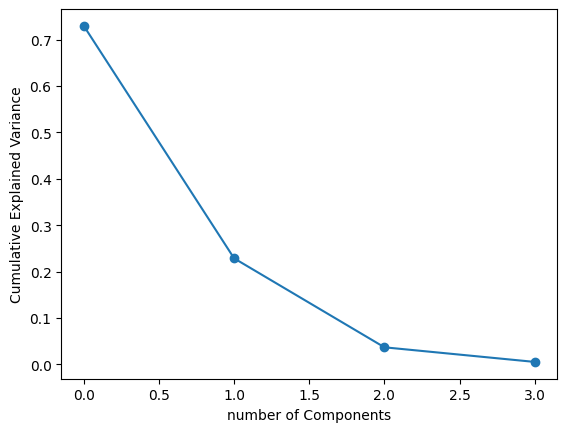

In [18]:
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('number of Components')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [19]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_iris = pd.DataFrame(principal_components, columns=['pc1', 'pc2'])
principal_iris

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


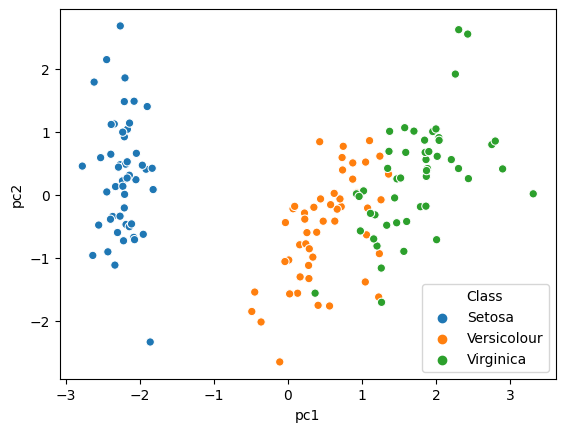

In [20]:
import seaborn as sns
sns.scatterplot('pc1', 'pc2', data=principal_iris, hue=iris['Class']);

In [21]:
import numpy as np
from sklearn.datasets import make_classification

In [22]:
from collections import Counter

x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
Counter(y)

Counter({0: 1900, 1: 100})

In [23]:
# !pip install -U pip setuptools
# !pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler